In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [ ]:
data = pd.read_csv("nlp-getting-started/train.csv")
data.head(5)

In [ ]:
############### CREATING METAFEATURES ##################
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))

data["mean_word_length"] = data["text"].apply(lambda x: np.mean([len(w) for w in str(x).lower().split()]))
data["tweet_length"] = data["text"].apply(lambda x: len(x))
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["stopwords_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split(' ') if w in stopwords]))
data["punctuation_count"] = data["text"].apply(lambda x: len([p for p in str(x) if p in punctuation]))
data["url_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split()
                                                      if "http" in w or "https" in w or "www" in w or "url" in w]))
data["hashtag_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if "#" in w]))
data["@_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if "@" in w]))

In [4]:
data.head(5)

,id,keyword,location,text,target,mean_word_length,tweet_length,word_count,stopwords_count,punctuation_count,url_count,hashtag_count,@_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,4.384615,69,13,6,1,0,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,4.571429,38,7,0,1,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,5.090909,133,22,11,3,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,7.125000,65,8,1,2,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,4.500000,88,16,7,2,0,2,0


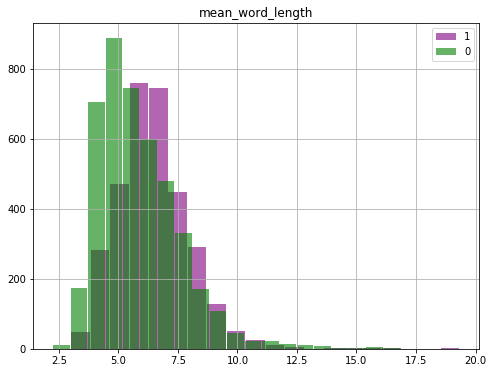

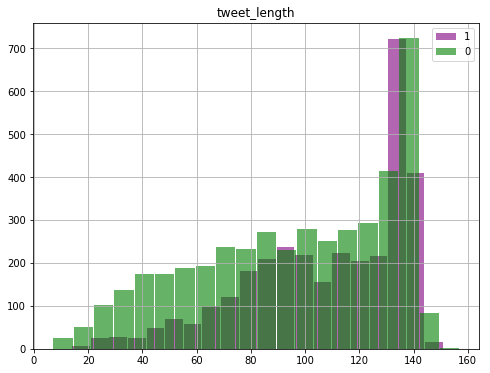

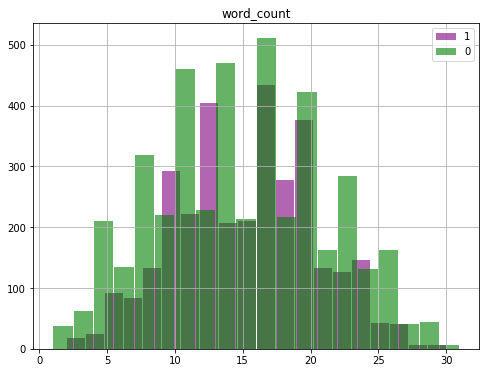

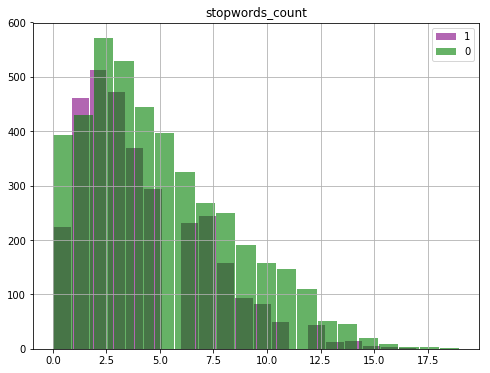

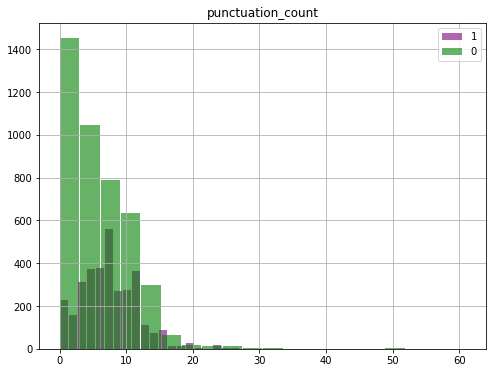

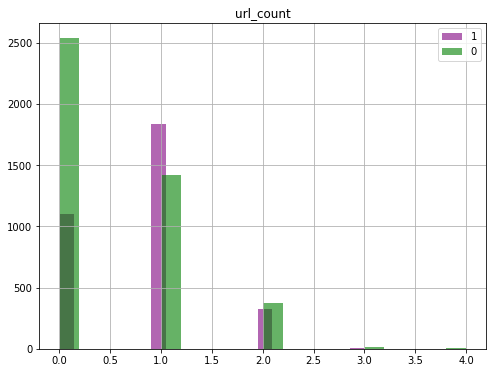

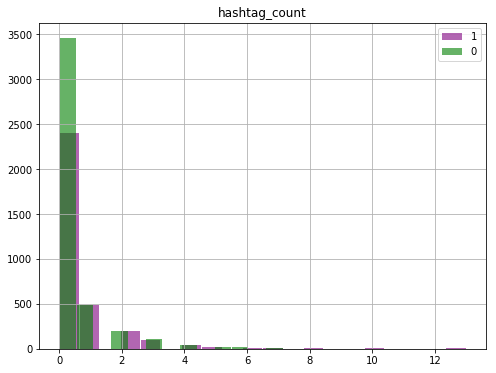

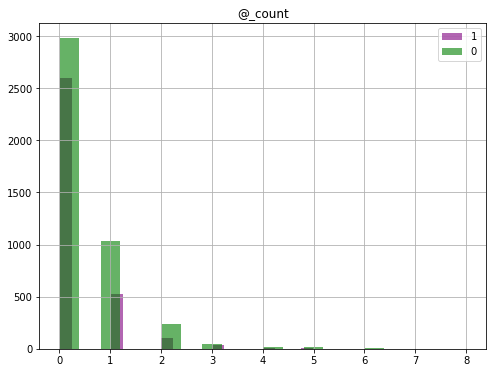

In [5]:
for column, row in data.items():
    if column not in ["id", "keyword", "location", "text", "target"]:
        plt.figure(figsize=[8,6])
        plt.title(column)
        data[column][data["target"]==1].hist(bins=20, color="purple", alpha=0.6, rwidth=0.95, label = "1")
        data[column][data["target"]==0].hist(bins=20, color="green", alpha=0.6, rwidth=0.95, label = "0")
        plt.legend()

In [6]:
from nltk.tokenize import word_tokenize

data["text"] = data["text"].str.lower()
data["tokens"] = data["text"].apply(nltk.word_tokenize)

data.head(5)

,id,keyword,location,text,target,mean_word_length,tweet_length,word_count,stopwords_count,punctuation_count,url_count,hashtag_count,@_count,tokens
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,4.384615,69,13,6,1,0,1,0,"[our, deeds, are, the, reason, of, this, #, ea..."
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,4.571429,38,7,0,1,0,0,0,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,5.090909,133,22,11,3,0,0,0,"[all, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,7.125000,65,8,1,2,0,1,0,"[13,000, people, receive, #, wildfires, evacua..."
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,4.500000,88,16,7,2,0,2,0,"[just, got, sent, this, photo, from, ruby, #, ..."


In [7]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

data["stemmed_tokens"] = data["tokens"].map(lambda y: [stemmer.stem(x) for x in y])

In [8]:
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))
#print(stopwords)
punctuation = list(punctuation)
punctuation.append(['http', '....', '.....'])

data = data.drop(columns=["text", "tokens"])

for i, token in data["stemmed_tokens"].items():
    for word in token:
        while word in (stopwords and punctuation):
            try:
                token.remove(word)
            except:
                break


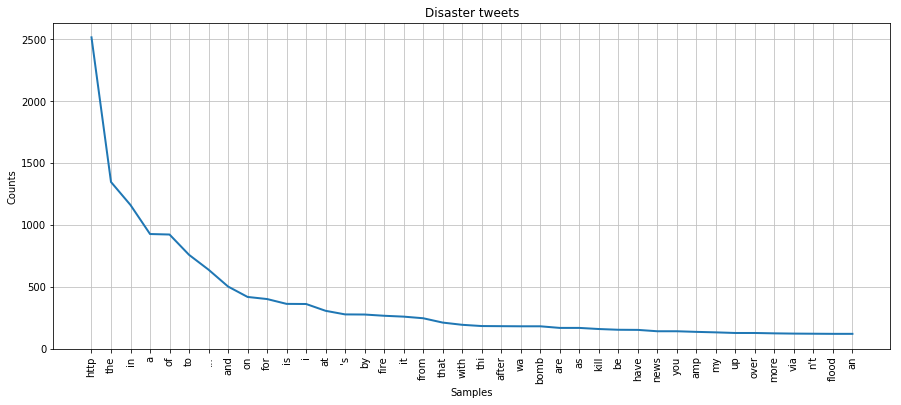

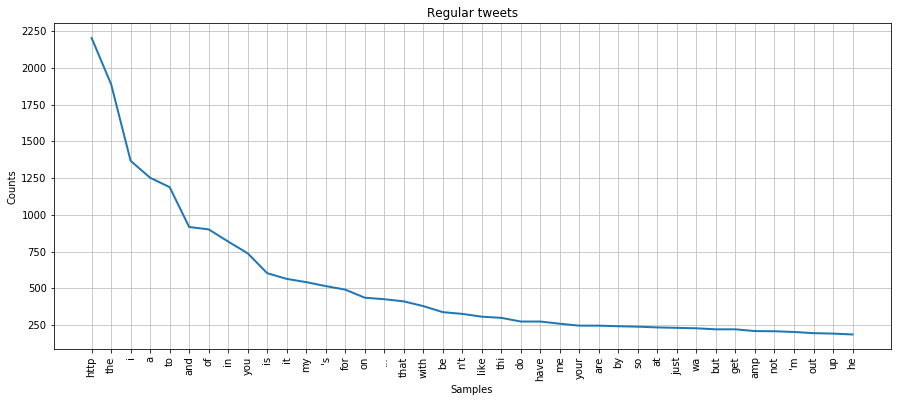

In [9]:
disaster_tweets = []
regular_tweets = []

for i, row in data.iterrows():
    if row["target"] == 1:
        disaster_tweets.append(row["stemmed_tokens"])
    else:
        regular_tweets.append(row["stemmed_tokens"])
        
disaster_tweets = [val for sublist in disaster_tweets for val in sublist]
regular_tweets = [val for sublist in regular_tweets for val in sublist]

freq_ds = nltk.FreqDist(disaster_tweets)
plt.figure(figsize=(15,6))
plt.title("Disaster tweets")
freq_ds.plot(40, cumulative=False)


freq_rg = nltk.FreqDist(regular_tweets)
plt.figure(figsize=(15,6))
plt.title("Regular tweets")
freq_rg.plot(40, cumulative=False)



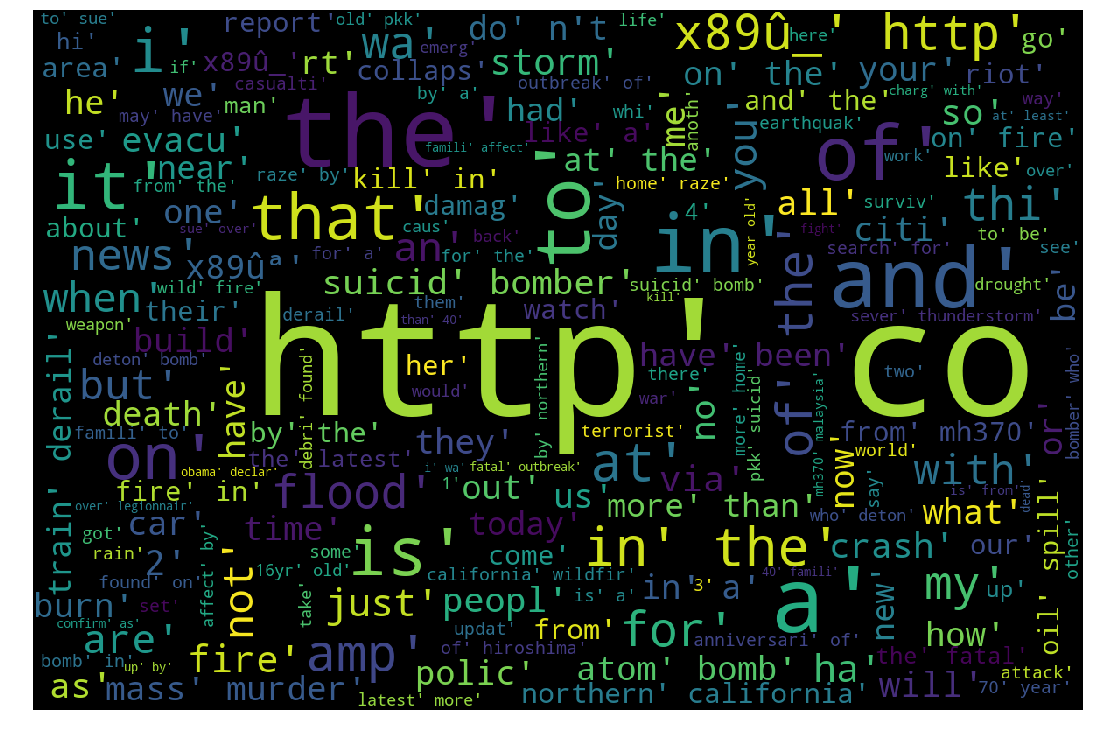

In [10]:
#print(disaster_tweets)

from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='black',
                min_font_size = 10).generate(str(disaster_tweets)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  

In [12]:
#!pip install gensim
data.head(5)

,id,keyword,location,target,mean_word_length,tweet_length,word_count,stopwords_count,punctuation_count,url_count,hashtag_count,@_count,stemmed_tokens
0,1,NaN,NaN,1,4.384615,69,13,6,1,0,1,0,"[our, deed, are, the, reason, of, thi, earthqu..."
1,4,NaN,NaN,1,4.571429,38,7,0,1,0,0,0,"[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,1,5.090909,133,22,11,3,0,0,0,"[all, resid, ask, to, 'shelter, in, place, are..."
3,6,NaN,NaN,1,7.125000,65,8,1,2,0,1,0,"[13,000, peopl, receiv, wildfir, evacu, order,..."
4,7,NaN,NaN,1,4.500000,88,16,7,2,0,2,0,"[just, got, sent, thi, photo, from, rubi, alas..."


In [99]:
from gensim.models import Word2Vec

model = Word2Vec(data["stemmed_tokens"], min_count=1, size=10, window=3)

In [119]:
print(f'Word2vec model containts: {len(model.wv.vocab)} words')

model.similarity('king', 'shelter')
model.wv["king"]

Word2vec model containts: 20274 words


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 0.05457138,  0.40461946, -0.70078796,  0.23181742, -0.2686425 ,
        0.45962   , -0.19787754,  0.19346413,  0.70663846,  0.4000133 ],
      dtype=float32)

In [101]:
word = "photo"
model.wv.vocab[word].index

233

In [127]:
data["Embedded"] = data["stemmed_tokens"].apply(lambda x: model.wv[x])
print(model.wv.vocab.keys())

dict_keys(['our', 'deed', 'are', 'the', 'reason', 'of', 'thi', 'earthquak', 'may', 'allah', 'forgiv', 'us', 'all', 'forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada', 'resid', 'ask', 'to', "'shelter", 'in', 'place', 'be', 'notifi', 'by', 'offic', 'no', 'other', 'evacu', 'or', 'shelter', 'order', 'expect', '13,000', 'peopl', 'receiv', 'wildfir', 'california', 'just', 'got', 'sent', 'photo', 'from', 'rubi', 'alaska', 'as', 'smoke', 'pour', 'into', 'a', 'school', 'rockyfir', 'updat', '>', 'hwi', '20', 'close', 'both', 'direct', 'due', 'lake', 'counti', 'cafir', 'flood', 'disast', 'heavi', 'rain', 'caus', 'flash', 'street', 'manit', 'colorado', 'spring', 'area', 'i', "'m", 'on', 'top', 'hill', 'and', 'can', 'see', 'wood', '...', 'there', "'s", 'an', 'emerg', 'happen', 'now', 'build', 'across', 'afraid', 'that', 'tornado', 'is', 'come', 'three', 'die', 'heat', 'wave', 'so', 'far', 'haha', 'south', 'tampa', 'get', 'hah-', 'wait', 'second', 'live', 'what', 'am', 'gon', 'na', 'do', 'fvck

In [136]:
def convert_data_to_index(string_data, wv):
    index_data = []
    for word in string_data:
        if word in wv.vocab:
            index_data.append(wv.vocab[word].index)
    return index_data

tweets = disaster_tweets + regular_tweets
tweets_index_data = convert_data_to_index(tweets, model.wv)
print(f"{tweets[:4]}:\t{tweets_index_data[:4]}")

['our', 'deed', 'are', 'the']:	[147, 3987, 25, 1]


In [134]:
embedding_matrix = np.zeros((len(model.wv.vocab), vector_dim))
for i in range(len(model.wv.vocab)):
    embedding_vector = model.wv[model.wv.index2word[i]]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

[147, 3987, 25, 1, 569, 5, 21, 326, 168, 1513, 3164, 109, 45, 232, 29, 286, 722, 5831, 5832, 1179, 45, 1514, 628, 4, 5833, 3, 490, 25, 20, 5834, 19, 327, 46, 280, 99, 61, 2267, 3, 490, 439, 25, 570, 5835, 62, 2628, 182, 99, 439, 3, 113, 35, 107, 1180, 21, 233, 24, 5836, 1796, 31, 302, 24, 182, 2629, 73, 2, 214, 2630, 294, 5837, 113, 1515, 966, 458, 3, 657, 925, 571, 4, 1014, 440, 29, 3988, 182, 75, 81, 842, 275, 135, 813, 75, 5, 552, 3, 5838, 1015, 926, 347, 6, 47, 12, 287, 5, 1, 1249, 7, 6, 74, 105, 2, 29, 3, 1, 2004, 8, 67, 14, 48, 76, 99, 295, 55, 3, 1, 82, 843, 1, 552, 6, 47, 2268, 16, 1, 441, 9, 108, 4, 147, 347, 8, 629, 62, 191, 24, 1, 361, 195, 36, 630, 882, 631, 2631, 9, 38, 75, 5839, 442, 2, 553, 6, 114, 3, 631, 2631, 54, 215, 6, 353, 185, 28, 54, 215, 6, 353, 185, 28, 5840, 75, 275, 75, 1797, 5841, 2631, 1516, 61, 2269, 94, 6, 216, 723, 3165, 75, 3, 3989, 883, 42, 884, 3989, 199, 4, 214, 421, 12, 2005, 3, 3990, 123, 77, 281, 5845, 2271, 377, 632, 0, 5846, 5848, 281, 63, 2272,

In [107]:
data.head(5)

,id,keyword,location,target,mean_word_length,tweet_length,word_count,stopwords_count,punctuation_count,url_count,hashtag_count,@_count,stemmed_tokens,Embedded
0,1,NaN,NaN,1,4.384615,69,13,6,1,0,1,0,"[our, deed, are, the, reason, of, thi, earthqu...","[[0.2075576, 1.0300083, -1.9617385, 0.65614796..."
1,4,NaN,NaN,1,4.571429,38,7,0,1,0,0,0,"[forest, fire, near, la, rong, sask, canada]","[[0.16609235, 0.83985704, -1.4808412, 0.516587..."
2,5,NaN,NaN,1,5.090909,133,22,11,3,0,0,0,"[all, resid, ask, to, 'shelter, in, place, are...","[[0.3601921, 1.3869777, -2.976942, 1.0726714, ..."
3,6,NaN,NaN,1,7.125000,65,8,1,2,0,1,0,"[13,000, peopl, receiv, wildfir, evacu, order,...","[[-0.043419693, 0.034243908, 0.009429485, -0.0..."
4,7,NaN,NaN,1,4.500000,88,16,7,2,0,2,0,"[just, got, sent, thi, photo, from, rubi, alas...","[[0.36634257, 1.3834025, -3.5423937, 1.1221149..."


# Feature selection

In [116]:
X = data.drop(["id", "keyword", "url_count", "@_count", "stemmed_tokens", "location", "target"], axis=1)
y = data["target"]

In [117]:
X.head(5)

,mean_word_length,tweet_length,word_count,stopwords_count,punctuation_count,hashtag_count,Embedded
0,4.384615,69,13,6,1,1,"[[0.2075576, 1.0300083, -1.9617385, 0.65614796..."
1,4.571429,38,7,0,1,0,"[[0.16609235, 0.83985704, -1.4808412, 0.516587..."
2,5.090909,133,22,11,3,0,"[[0.3601921, 1.3869777, -2.976942, 1.0726714, ..."
3,7.125000,65,8,1,2,1,"[[-0.043419693, 0.034243908, 0.009429485, -0.0..."
4,4.500000,88,16,7,2,2,"[[0.36634257, 1.3834025, -3.5423937, 1.1221149..."


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold